## **Problem Statement**


- Avocado are sourced from over 1000 growers owning over 65,000 acres across California, Mexico, Chile, and Peru.
- With generations of experience growing, packing, and shipping avocados, they have a deep understanding of the avocado industry.
- Their aim is to source quality fruit that’s sustainably grown and handled in the most efficient, shortest supply route possible.
- They want to increase their supply throughout the United States and need to make sure that they are selling their products at the best possible price.
- Avocado prices have rocketed in recent years by up to 129%, with the average national price in the US of a single Hass avocado reaching $2.10 in 2019, almost doubling in just one year.
- Due to this uncertainty in the prices, the company is not able to sell their produce at the optimal price.
- Your task is to predict the optimal price of the avocardo using the previous sales data of avocardo according to different regions.



**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px

from scipy.stats import zscore
from scipy.stats import norm, boxcox
from scipy import stats

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
from sklearn.ensemble import RandomForestRegressor as rf
from yellowbrick.regressor import PredictionError
from sklearn.naive_bayes import GaussianNB           

In [3]:
from sklearn.metrics import precision_recall_curve                  
from sklearn.metrics import classification_report                   
from sklearn.metrics import plot_confusion_matrix         

In [4]:
from sklearn.feature_selection import SelectFromModel               
from yellowbrick.model_selection import FeatureImportances  

### **Data Loading and Description**
- Data provided by INSAID through GitHub


In [5]:
av = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv",index_col=0)


## Split Data First
- To simulate the realtime data availability, we shall split the data into Train and Test set in the very begining. 
- Do data processing and EDA on Train set
- Do data processing on Test Set as per Train Set
- Split the data into X and y sets for modelling
- Create Models
- Do predictions

In [6]:
av.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
#Split
from sklearn.model_selection import train_test_split
av_train, av_test = train_test_split(av, test_size=0.20, random_state=1)

In [8]:
av_train=av_train.reset_index(drop=True)
av_train.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2017-01-15,0.68,7103726.14,4335593.06,1264050.32,18959.07,1485123.69,1360058.70,110035.17,15029.82,conventional,2017,SouthCentral
1,2017-06-11,2.37,3056.43,0.00,164.45,0.00,2891.98,1093.12,1798.86,0.00,organic,2017,Syracuse


In [9]:
av_test = av_test.reset_index(drop=True)
av_test.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2016-07-17,2.11,30480.39,1924.24,25560.94,35.13,2960.08,363.33,2596.75,0.00,organic,2016,Seattle
1,2015-12-20,0.98,416298.84,82416.56,134956.77,13276.06,185649.45,185479.46,29.77,140.22,conventional,2015,Portland


## Processing of Train DataSet: av_train

In [10]:
av_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14599 entries, 0 to 14598
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          14599 non-null  object 
 1   AveragePrice  14599 non-null  float64
 2   Total Volume  14599 non-null  float64
 3   4046          14599 non-null  float64
 4   4225          14599 non-null  float64
 5   4770          14599 non-null  float64
 6   Total Bags    14599 non-null  float64
 7   Small Bags    14599 non-null  float64
 8   Large Bags    14599 non-null  float64
 9   XLarge Bags   14599 non-null  float64
 10  type          14599 non-null  object 
 11  year          14599 non-null  int64  
 12  region        14599 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.4+ MB


In [11]:
av_train.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### Data Preprocessing
- Data Preprocessing is initally done only on av_train.
- Test data is modified as per the final result of pre-processing and EDA on train data

In [12]:
# Convert columns to lower case
av_train.columns = av_train.columns.str.lower()

In [13]:
# Remane Columns
av_train.rename(columns={'averageprice':'price','total volume':'volume','total bags':'total_bags','small bags':'s','large bags':'l',
                   'xlarge bags': 'xl'}, inplace=True)

In [14]:
av_train.head()

,date,price,volume,4046,4225,4770,total_bags,s,l,xl,type,year,region
0,2017-01-15,0.68,7103726.14,4335593.06,1264050.32,18959.07,1485123.69,1360058.70,110035.17,15029.82,conventional,2017,SouthCentral
1,2017-06-11,2.37,3056.43,0.00,164.45,0.00,2891.98,1093.12,1798.86,0.00,organic,2017,Syracuse
2,2016-02-21,1.18,17232.43,7305.62,614.56,0.00,9312.25,6311.81,3000.44,0.00,organic,2016,DallasFtWorth
3,2017-07-09,2.12,40058.59,1411.24,16587.80,24.73,22034.82,281.45,21753.37,0.00,organic,2017,Seattle
4,2017-11-05,1.26,194103.11,8575.56,86633.97,752.93,98140.65,35477.95,62594.13,68.57,conventional,2017,Indianapolis


### Date

In [15]:
# Check for duplicat dates as to avoid missrepersentation of dates
date_duplicates = av_train[av_train.duplicated()]
date_duplicates.count()

date          0
price         0
volume        0
4046          0
4225          0
4770          0
total_bags    0
s             0
l             0
xl            0
type          0
year          0
region        0
dtype: int64

In [16]:
#checking for # of unique days when data was recorded
av_train['date'].nunique()

169

In [17]:
# Convertind date from object to datetime for further processing
av_train['date'] = pd.to_datetime(av_train['date'])

In [18]:
# For checking pattern of days day on which data was reorded
av_train['weekday'] = av_train['date'].dt.day_name()

In [19]:
av_train['weekday'].unique()

array(['Sunday'], dtype=object)

In [20]:
# Extract month in datetime format to do month wise analysis
av_train['month'] = av_train['date'].dt.month

In [21]:
# # Extract year in datetime format to do year wise analysis
av_train['yr'] = av_train['date'].dt.year

In [22]:
# Check unique years
av_train.year.unique()

array([2017, 2016, 2015, 2018])

In [23]:
# This function extracts seasons as per dates on which data was recorded.
# Seasonal variations are more profound in food products than monthly variations.
# It also accounts to variation in production to be contained in seasons

def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'


In [24]:
# Assuming df has a date column of type `datetime`
av_train['seasons'] = av_train.date.map(season_of_date)

In [26]:
# Drop columns not necessary for EDA
av_train.drop(['year','date','weekday'], axis = 1,inplace = True)

In [27]:
av_train.head(5)

,price,volume,4046,4225,4770,total_bags,s,l,xl,type,region,month,yr,seasons
0,0.68,7103726.14,4335593.06,1264050.32,18959.07,1485123.69,1360058.70,110035.17,15029.82,conventional,SouthCentral,1,2017,winter
1,2.37,3056.43,0.00,164.45,0.00,2891.98,1093.12,1798.86,0.00,organic,Syracuse,6,2017,spring
2,1.18,17232.43,7305.62,614.56,0.00,9312.25,6311.81,3000.44,0.00,organic,DallasFtWorth,2,2016,winter
3,2.12,40058.59,1411.24,16587.80,24.73,22034.82,281.45,21753.37,0.00,organic,Seattle,7,2017,summer
4,1.26,194103.11,8575.56,86633.97,752.93,98140.65,35477.95,62594.13,68.57,conventional,Indianapolis,11,2017,autumn


### Observations
- There are no missing data
- Extracted month, weekday and year from the date column
- Weekday was used to check the freqency of data collection and it was seen to be uniform on all Sundays
- Hence weekday was dropped along with date and year
- Year was extracted from the datefield as dtype datetime
- Moth will be used to see sesonal influence

### Region

In [28]:
# Check for unique region
av_train['region'].unique()

array(['SouthCentral', 'Syracuse', 'DallasFtWorth', 'Seattle',
       'Indianapolis', 'SouthCarolina', 'RichmondNorfolk', 'Southeast',
       'Nashville', 'Orlando', 'Albany', 'HartfordSpringfield',
       'Pittsburgh', 'Portland', 'Jacksonville', 'NewYork', 'Columbus',
       'Houston', 'Spokane', 'Plains', 'Louisville', 'Midsouth',
       'LosAngeles', 'PhoenixTucson', 'Roanoke', 'RaleighGreensboro',
       'StLouis', 'NewOrleansMobile', 'WestTexNewMexico', 'LasVegas',
       'SanDiego', 'Charlotte', 'Boise', 'TotalUS', 'West',
       'HarrisburgScranton', 'California', 'Detroit', 'Sacramento',
       'CincinnatiDayton', 'Tampa', 'Chicago', 'GreatLakes',
       'BaltimoreWashington', 'Atlanta', 'Denver', 'GrandRapids',
       'Boston', 'Northeast', 'SanFrancisco', 'BuffaloRochester',
       'Philadelphia', 'MiamiFtLauderdale', 'NorthernNewEngland'],
      dtype=object)

### Observation
- Total US seems to be a summation of Avocado produced from all the regions.
- This may be used to predict seprately for the total price and volume.
- However, it seems that region affect the price and hence to have a realistic predicton based on effect of region, Total US is not included in the initial model.

### Checking for 3 Assumption 
- Nature of distribution of price ie normal or not
- Linear relation between target variable y and x variables
- Multicolinearity between x variables

<AxesSubplot:>

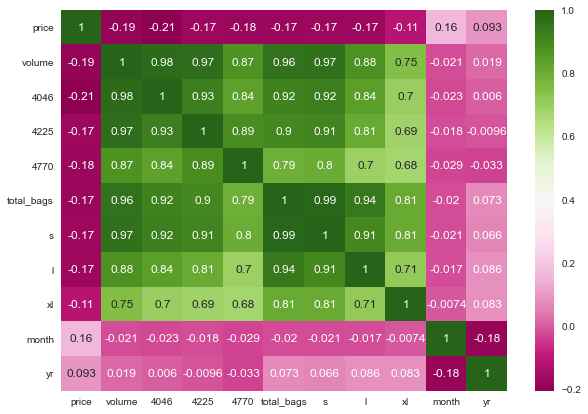

In [30]:
# Checking for multicolinearity among X variables in train data set
# use heatmap
plt.figure (figsize=(10,7))
correlation_av_train = sns.heatmap(av_train.corr(), annot = True, cmap='PiYG')
correlation_av_train

### Observation
- This is done to check multicolinearity between explanatory variables.
- Total bags and total volume have high correlation of .9 and is obvious hence only volume will be used
- The PUL colums also have high correalation to volume and hence will be dropped
- Bag size also has high correlation to volume and hence will be dropped

In [32]:
#Droping varibles with high correlation amongst X variables
av_train.drop(['4046','4225','4770','total_bags','s','l','xl'], axis = 1, inplace = True)

In [34]:
av_train.head(5)

,price,volume,type,region,month,yr,seasons
0,0.68,7103726.14,conventional,SouthCentral,1,2017,winter
1,2.37,3056.43,organic,Syracuse,6,2017,spring
2,1.18,17232.43,organic,DallasFtWorth,2,2016,winter
3,2.12,40058.59,organic,Seattle,7,2017,summer
4,1.26,194103.11,conventional,Indianapolis,11,2017,autumn


### Price - Volume
- Check assumption that there is a linear relation between target 

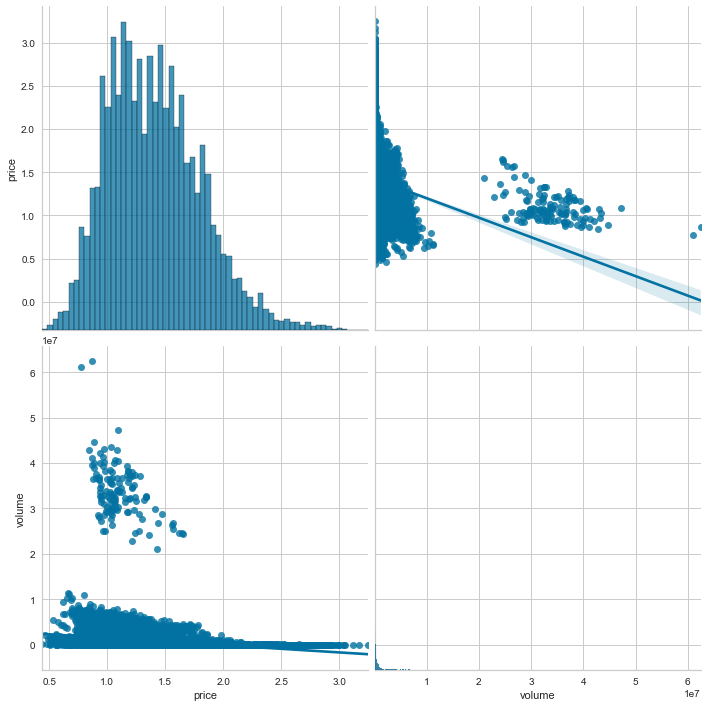

In [37]:
sns.pairplot(av_train, vars={'price','volume'}, height=5,aspect=1, kind='reg')

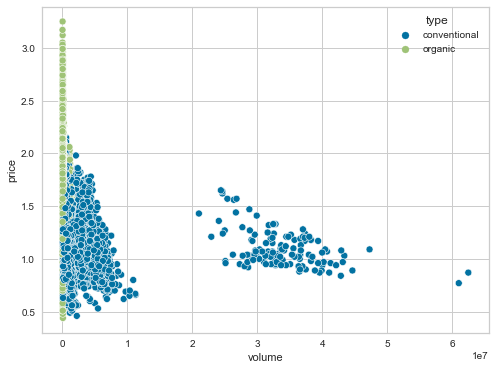

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='volume', y = 'price', hue= 'type', data= av_train);

### Observation
- There is a clear inverse linear relation between price and volume.

### Check the distribution of prices

<AxesSubplot:xlabel='price', ylabel='Density'>

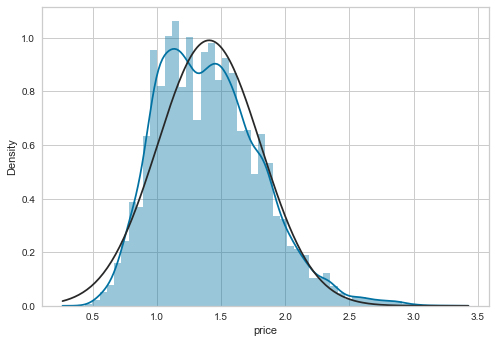

In [39]:
sns.distplot(av_train["price"], fit=norm)

<AxesSubplot:xlabel='price', ylabel='Density'>

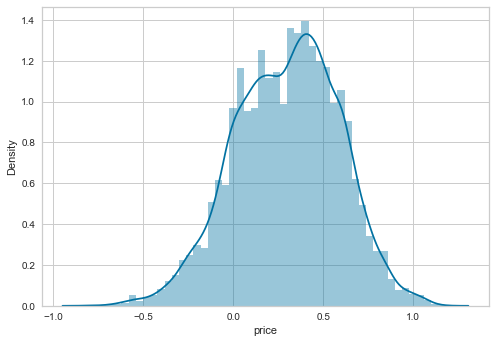

In [40]:
sns.distplot(np.log(av_train["price"]))

### Observation
- The distribution of prices is fairly normal

## EDA

### Price - Region

In [41]:
av_train[["region", "price"]].groupby("region").mean()

,price
region,
Albany,1.556835
Atlanta,1.342129
BaltimoreWashington,1.539885
Boise,1.343210
Boston,1.534045
BuffaloRochester,1.528045
California,1.396431
Charlotte,1.610000
Chicago,1.567037


<AxesSubplot:xlabel='region'>

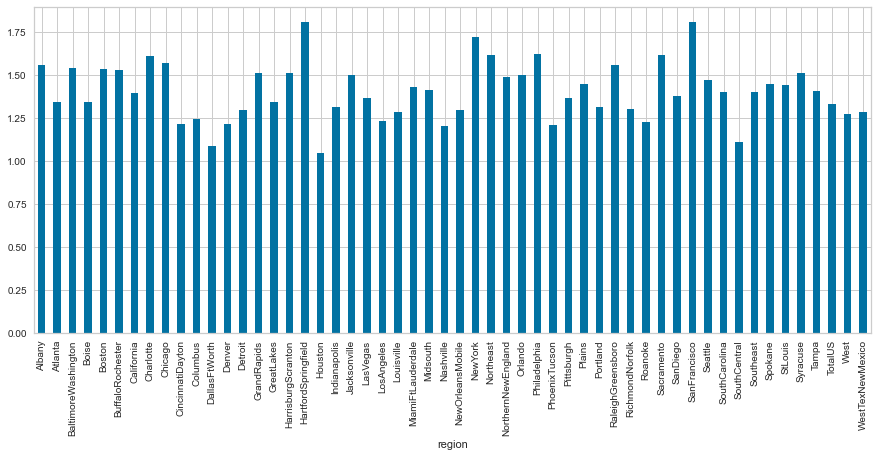

In [42]:
av_train.groupby(['region'])['price'].mean().plot(kind='bar', figsize=(15,6))

<AxesSubplot:xlabel='region'>

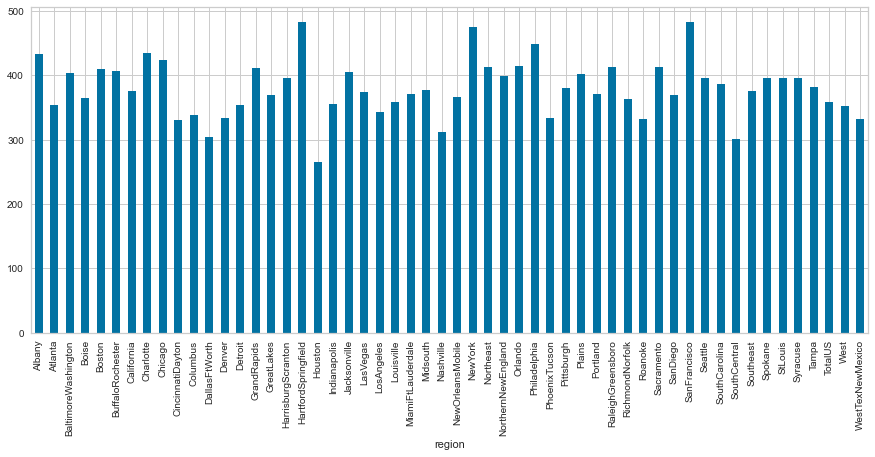

In [45]:
av_train.groupby(['region'])['price'].sum().plot(kind='bar', figsize=(15,6))

### Volume  - Region

In [46]:
av_train[["region", "volume"]].groupby("region").mean()

,volume
region,
Albany,4.808571e+04
Atlanta,2.538932e+05
BaltimoreWashington,3.895301e+05
Boise,4.374959e+04
Boston,2.786894e+05
BuffaloRochester,6.786018e+04
California,3.052207e+06
Charlotte,1.034398e+05
Chicago,3.811155e+05


<AxesSubplot:xlabel='region'>

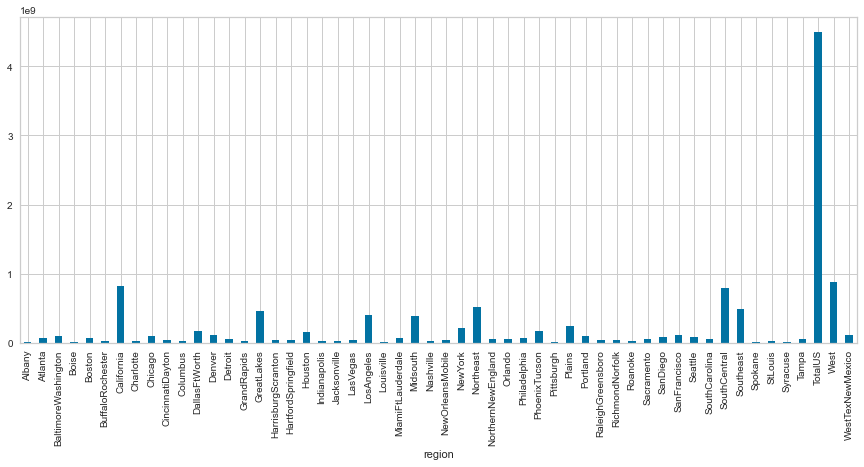

In [48]:
av_train.groupby(['region'])['volume'].sum().plot(kind='bar', figsize=(15,6))

<AxesSubplot:xlabel='region'>

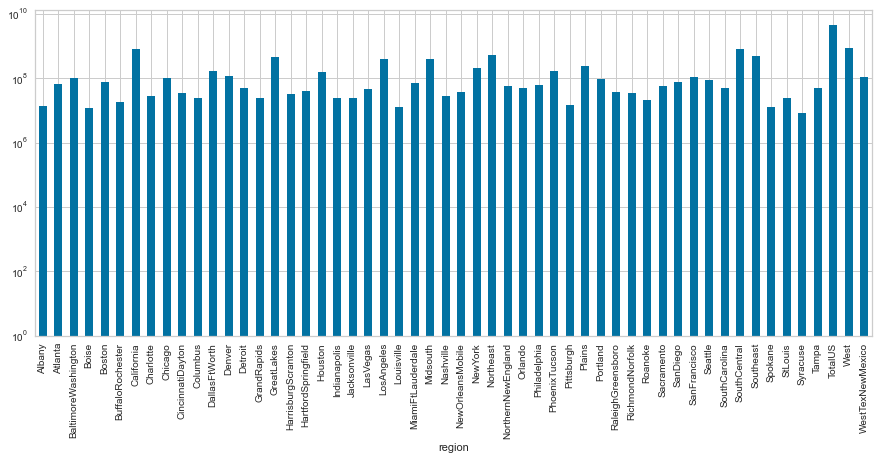

In [49]:
av_train.groupby(['region'])['volume'].sum().plot(kind='bar', log = True, figsize=(15,6))

<AxesSubplot:xlabel='region'>

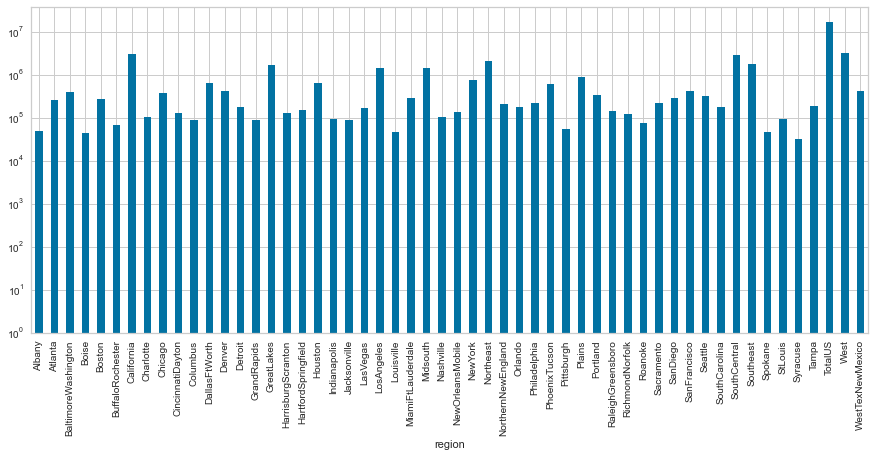

In [50]:
av_train.groupby(['region'])['volume'].mean().plot(kind='bar', log = True, figsize=(15,6))

In [54]:
# Creating two seperate datasets, one for total US and one for all other regions
# Total US : us_train,     us_test

# Train Datasets
us_train     = av_train[(av_train['region'] == 'TotalUS')]
region_train = av_train[(av_train['region'] != 'TotalUS')]

In [55]:
print("us_train shape     :", us_train.shape)
print("region_train shape :", region_train.shape)


us_train shape     : (269, 7)
region_train shape : (14330, 7)


In [57]:
# since we are predicting the prices total US volume will be sum of the regions and hence it is being removed
us_train.head(5)

,price,volume,type,region,month,yr,seasons
52,1.26,1179603.03,organic,TotalUS,4,2016,spring
65,1.66,638192.89,organic,TotalUS,6,2015,summer
67,1.18,38315500.43,conventional,TotalUS,4,2017,spring
78,1.07,40741214.05,conventional,TotalUS,3,2018,winter
107,1.58,616177.00,organic,TotalUS,2,2015,winter


In [58]:
region_train.head(5)

,price,volume,type,region,month,yr,seasons
0,0.68,7103726.14,conventional,SouthCentral,1,2017,winter
1,2.37,3056.43,organic,Syracuse,6,2017,spring
2,1.18,17232.43,organic,DallasFtWorth,2,2016,winter
3,2.12,40058.59,organic,Seattle,7,2017,summer
4,1.26,194103.11,conventional,Indianapolis,11,2017,autumn


### Price - Type

In [60]:
us_train[["type", "price"]].groupby("type").mean()

,price
type,
conventional,1.099690
organic,1.544929


In [61]:
region_train[["type", "price"]].groupby("type").mean()

,price
type,
conventional,1.158239
organic,1.654854


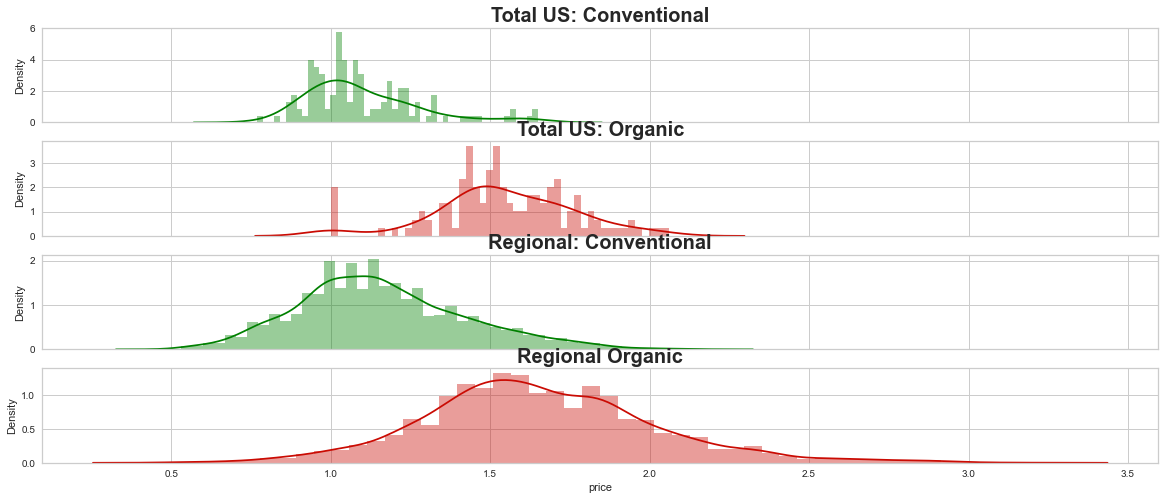

In [68]:
us_organic      = us_train['price'][us_train['type']=='organic']
us_conventional = us_train['price'][us_train['type']=='conventional']

rg_organic      = region_train['price'][region_train['type']=='organic']
rg_conventional = region_train['price'][region_train['type']=='conventional']

f,ax = plt.subplots(4,1,figsize=(20,8), sharex = True);

sns.distplot(a = us_conventional, bins = 50, ax = ax[0], color = 'green');
sns.distplot(a = us_organic, bins = 50, ax = ax[1], color = 'r');
sns.distplot(a = rg_conventional, bins = 50, ax = ax[2], color = 'green');
sns.distplot(a = rg_organic, bins = 50, ax = ax[3], color = 'r');

ax[0].set_title('Total US: Conventional', fontsize=20,fontweight='bold');
ax[1].set_title('Total US: Organic',fontsize= 20, fontweight='bold');

ax[2].set_title('Regional: Conventional', fontsize=20,fontweight='bold');
ax[3].set_title('Regional Organic',fontsize= 20, fontweight='bold');

### Price - Month

In [95]:
us_price = us_train[["month", "price"]].groupby("month").mean()
region_price = region_train[["month", "price"]].groupby("month").mean()

In [145]:
price_data = pd.merge(us_price,region_price, on ='month')
price_data = price_data.reset_index()
price_data = price_data.rename(columns={'price_x':'total','price_y':'region'})
price_data

,month,total,region
0,1,1.244583,1.309100
1,2,1.219600,1.279425
2,3,1.239630,1.330083
3,4,1.249545,1.371305
4,5,1.256667,1.355157
5,6,1.357619,1.404233
6,7,1.340833,1.469734
7,8,1.352273,1.514395
8,9,1.555238,1.564734
9,10,1.558571,1.589680


<AxesSubplot:xlabel='month'>

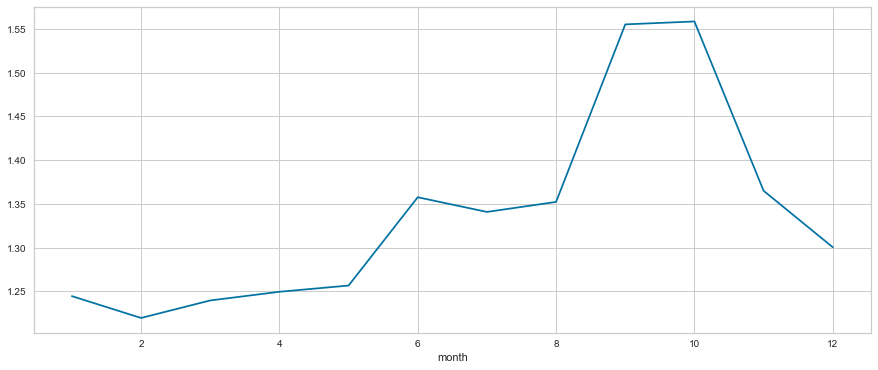

In [146]:
us_train.groupby(['month'])['price'].mean().plot(kind='line', figsize=(15,6))

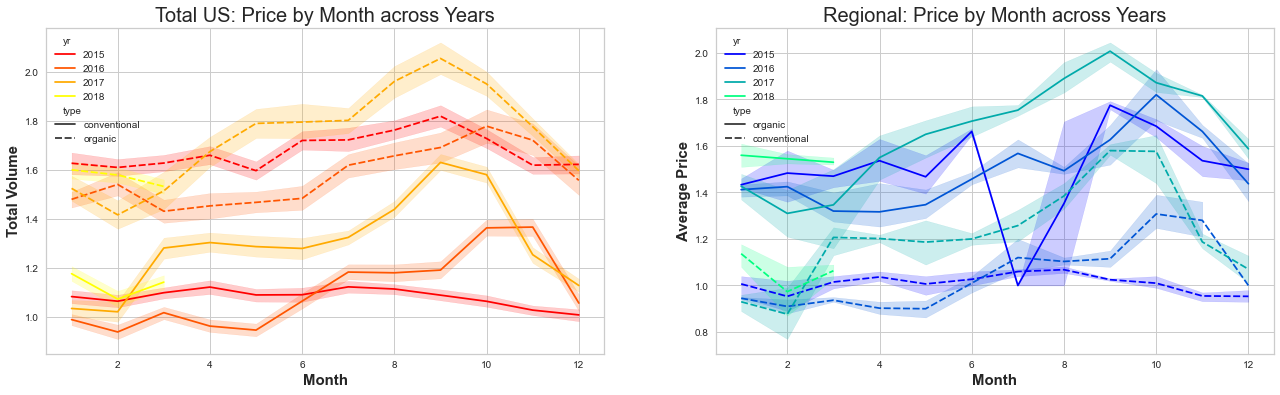

In [155]:
# Comapring Price across Years and Months
f,ax = plt.subplots(1,2,figsize=(22,6));
sns.lineplot(x='month',y='price', hue='yr',data= us_train,palette='winter', ax=ax[1],linestyle='-.',style='type');
sns.lineplot(x='month',y='price', hue='yr',data= region_train,palette='autumn', ax= ax[0],style='type');
ax[0].set_title('Total US: Price by Month across Years', fontsize=20, );
ax[1].set_title('Regional: Price by Month across Years',fontsize= 20);
ax[0].set_xlabel('Month',fontweight='bold',fontsize=15);
ax[1].set_xlabel('Month', fontweight='bold',fontsize=15);
ax[0].set_ylabel('Total Volume',fontweight='bold',fontsize=15);
ax[1].set_ylabel('Average Price', fontweight='bold',fontsize=15);

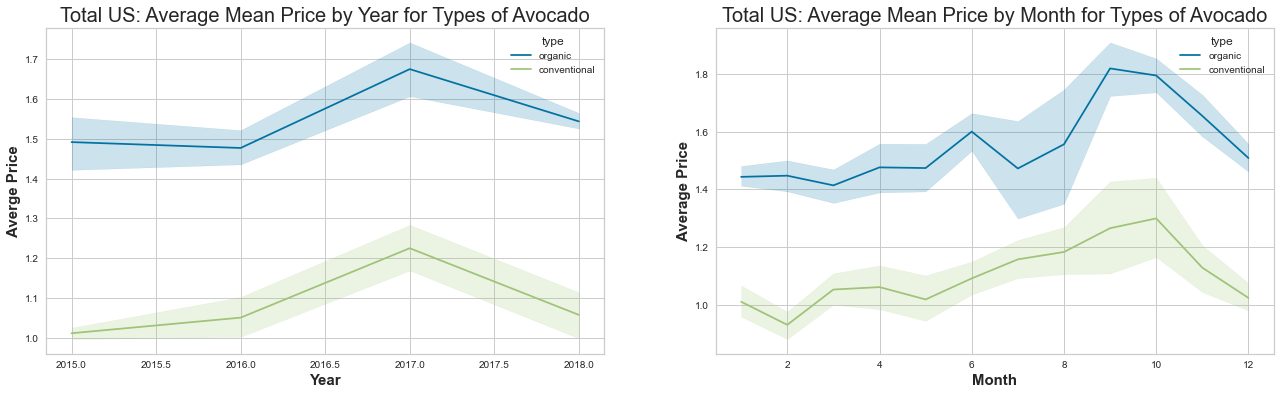

In [156]:
f,ax = plt.subplots(1,2,figsize=(22,6));
sns.lineplot(x='month',y='price', hue='type',data=us_train ,ax=ax[1]);
sns.lineplot(x='yr',y='price', hue='type',data=us_train, ax= ax[0]);
ax[0].set_title('Total US: Average Mean Price by Year for Types of Avocado', fontsize=20, );
ax[1].set_title('Total US: Average Mean Price by Month for Types of Avocado',fontsize= 20);
ax[0].set_xlabel('Year',fontweight='bold',fontsize=15);
ax[1].set_xlabel('Month', fontweight='bold',fontsize=15);
ax[0].set_ylabel('Averge Price',fontweight='bold',fontsize=15);
ax[1].set_ylabel('Average Price', fontweight='bold',fontsize=15);

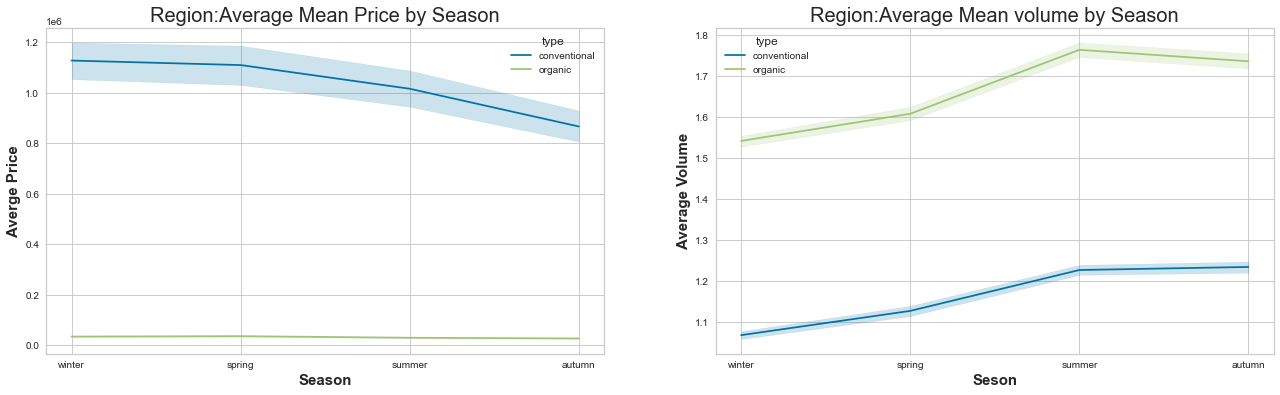

In [158]:
f,ax = plt.subplots(1,2,figsize=(22,6));
sns.lineplot(x='seasons',y='price', hue='type',data=region_train,ax=ax[1]);
sns.lineplot(x='seasons',y='volume', hue='type',data=region_train, ax= ax[0]);
ax[0].set_title('Region:Average Mean Price by Season', fontsize=20, );
ax[1].set_title('Region:Average Mean volume by Season',fontsize= 20);
ax[0].set_xlabel('Season',fontweight='bold',fontsize=15);
ax[1].set_xlabel('Seson', fontweight='bold',fontsize=15);
ax[0].set_ylabel('Averge Price',fontweight='bold',fontsize=15);
ax[1].set_ylabel('Average Volume', fontweight='bold',fontsize=15);

In [163]:
us_train.drop(['month', 'yr'], axis=1, inplace =True)

In [164]:
region_train.drop(['month', 'yr'], axis=1, inplace =True)

In [166]:
region_train.head(3)

,price,volume,type,region,seasons
0,0.68,7103726.14,conventional,SouthCentral,winter
1,2.37,3056.43,organic,Syracuse,spring
2,1.18,17232.43,organic,DallasFtWorth,winter


### Observation
- Seasons shhow a better effect than months and hence will be usedin predictions
- Price varies with Volume and Season
- Organic has a premium price compared to Conventional
- Price of both organic and conventional vary seasonally
- Price is seen to be higer during winter season.
- Month colum and year colum can be dropped

### Preparing The Test Data

In [168]:
av_test.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2016-07-17,2.11,30480.39,1924.24,25560.94,35.13,2960.08,363.33,2596.75,0.00,organic,2016,Seattle
1,2015-12-20,0.98,416298.84,82416.56,134956.77,13276.06,185649.45,185479.46,29.77,140.22,conventional,2015,Portland


In [169]:
av_test.drop(['4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year'],axis=1, inplace=True)


In [170]:
av_test.rename(columns={'AveragePrice':'price','Total Volume':'volume'}, inplace=True)

In [171]:
av_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   price   3650 non-null   float64
 2   volume  3650 non-null   float64
 3   type    3650 non-null   object 
 4   region  3650 non-null   object 
dtypes: float64(2), object(3)
memory usage: 142.7+ KB


In [172]:
# Extracting seasons from date
av_test['Date'] = pd.to_datetime(av_test['Date'])

In [173]:
av_test['seasons'] = av_test.Date.map(season_of_date)

In [174]:
av_test.drop('Date',axis=1,inplace=True)

In [175]:
av_test.head()

,price,volume,type,region,seasons
0,2.11,30480.39,organic,Seattle,summer
1,0.98,416298.84,conventional,Portland,autumn
2,1.17,529138.31,conventional,Orlando,spring
3,1.78,181725.85,organic,California,spring
4,1.61,1377.24,organic,GrandRapids,spring


In [176]:
# creating seperate datasets for regional and total US data
region_test = av_test[(av_test['region'] != 'TotalUS')]
us_test     = av_test[(av_test['region'] == 'TotalUS')]

### Feature Selection
- Since we have done the split already lets do feature selection for train and test data

### Regional Data

In [179]:
# There are various ways to do the feature selection, here is one
# Train Data
X1_train = region_train.loc[:, region_train.columns != 'price']
y1_train = region_train['price']

#Test Data
X1_test = region_test.loc[:, region_train.columns != 'price']
y1_test = region_test['price']

In [180]:
print('X1_train :', X1_train.shape)
print('y1_train :', y1_train.shape)
print('X1_test  :', X1_test.shape)
print('y1_test  :', y1_test.shape)
print(y1_test.dtype)
print(y1_train.dtype)

X1_train : (14330, 4)
y1_train : (14330,)
X1_test  : (3581, 4)
y1_test  : (3581,)
float64
float64


### Encoding Categorical Variables using one hot encoding

In [181]:
X1_train = pd.get_dummies(X1_train, columns=['type','region','seasons'], drop_first =True)
X1_test  = pd.get_dummies(X1_test, columns=['type','region','seasons'], drop_first =True)

In [182]:
X1_train.head()

,volume,type_organic,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,...,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_West,region_WestTexNewMexico,seasons_spring,seasons_summer,seasons_winter
0,7103726.14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3056.43,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,17232.43,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,40058.59,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,194103.11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
X1_test.shape

(3581, 57)

### Sacling the Exploratory Variables

In [185]:
#fitting is determining what to do
#transforming - actually doing it

scaler = StandardScaler() # cleate an object
scaler.fit(X1_train) #what should be the multiplication factor
X1_trains = scaler.transform(X1_train) #actually multiplies
X1_tests  = scaler.transform(X1_test)

###  Modelling

### Linear Regression

In [186]:
LinearReg = LinearRegression()
LinearReg.fit(X1_train, y1_train)
y1_lr_train = LinearReg.predict(X1_trains)
y1_lr_test  = LinearReg.predict(X1_tests)

In [187]:
RMSE_test_lr = np.sqrt(metrics.mean_squared_error(y1_test, y1_lr_test)) 
RMSE_train_lr = np.sqrt(metrics.mean_squared_error(y1_train, y1_lr_train)) 

R2_score_train_lr =  metrics.r2_score(y1_train, y1_lr_train)
R2_score_test_lr =  metrics.r2_score(y1_test, y1_lr_test)

print('Train RMSE_lr :' ,  RMSE_train_lr)
print('Test  RMSE_lr :' ,  RMSE_test_lr)
print('Train R2_lr   :', R2_score_train_lr)
print('Test  R2_lr   :', R2_score_test_lr)

Train RMSE_lr : 1.0921887674462225
Test  RMSE_lr : 1.1041294918518212
Train R2_lr   : -6.302111588552732
Test  R2_lr   : -6.4512773729089625


In [188]:
df_linReg_result = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_lr_test})
df_linReg_result.head(5)

,Actual,Predicted
0,2.11,2.523681
1,0.98,0.432636
2,1.17,1.443156
3,1.78,2.080984
4,1.61,2.444858


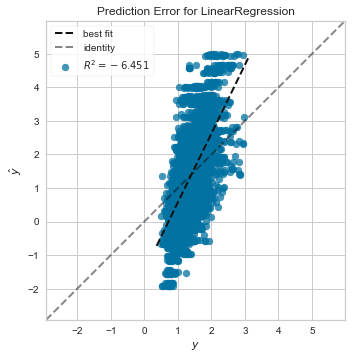

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [189]:
visualizer = PredictionError(LinearReg)
visualizer.fit(X1_trains, y1_train)  
visualizer.score(X1_tests, y1_test)        
visualizer.show()

### Random Forest Regression¶

In [190]:
RandForestReg = rf()
RandForestReg.fit(X1_trains, y1_train)
y1_rf_train = RandForestReg.predict(X1_trains)
y1_rf_test  = RandForestReg.predict(X1_tests)

In [191]:
RMSE_test_rf = np.sqrt(metrics.mean_squared_error(y1_test, y1_rf_test)) 
RMSE_train_rf = np.sqrt(metrics.mean_squared_error(y1_train, y1_rf_train)) 

R2_score_train_rf =  metrics.r2_score(y1_train, y1_rf_train)
R2_score_test_rf =  metrics.r2_score(y1_test, y1_rf_test)

print('Train RMSE_lr :' ,  RMSE_train_rf)
print('Test  RMSE_lr :' ,  RMSE_test_rf)
print('Train R2_lr   :', R2_score_train_rf)
print('Test  R2_lr   :', R2_score_test_rf)

Train RMSE_lr : 0.08223283070762695
Test  RMSE_lr : 0.21918108884223184
Train R2_lr   : 0.9586054148549707
Test  R2_lr   : 0.7063724037014705


In [192]:
df_RandForestReg_result = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_rf_test})
df_RandForestReg_result.head(5)

,Actual,Predicted
0,2.11,2.1931
1,0.98,1.1133
2,1.17,0.9010
3,1.78,1.5905
4,1.61,1.9797


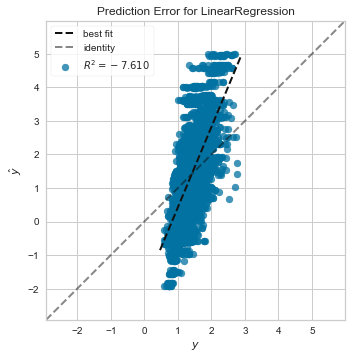

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [193]:
visualizer = PredictionError(LinearReg)
visualizer.fit(X1_trains, y1_train)  
visualizer.score(X1_tests, y1_rf_test)        
visualizer.show()

### Gaussian Navie Bais Regression

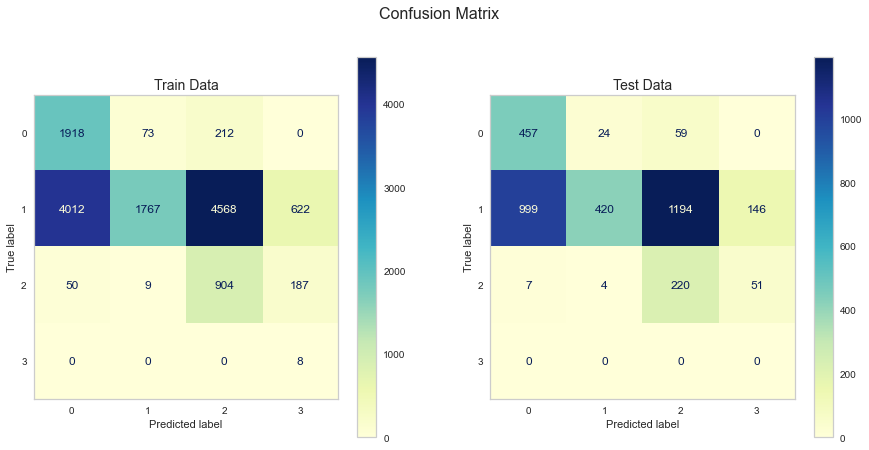

In [194]:
# There is a requirement to convert traget price into data type
y1_test_nb=y1_test.astype('int')
y1_train_nb=y1_train.astype('int')

naive = GaussianNB()
naive.fit(X1_trains, y1_train_nb)

y1_train_gnb = naive.predict(X1_trains)
y1_test_gnb  = naive.predict(X1_tests)

y1_train_gnb_proba = naive.predict_proba(X1_trains)
y1_test_gnb_proba = naive.predict_proba(X1_tests)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = naive, X = X1_trains, y_true = y1_train_nb, values_format = '.7g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = naive, X = X1_tests, y_true = y1_test_nb, values_format = '.7g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

In [195]:
RMSE_test_gnb = np.sqrt(metrics.mean_squared_error(y1_test, y1_test_gnb)) 
RMSE_train_gnb = np.sqrt(metrics.mean_squared_error(y1_train, y1_train_gnb)) 

R2_score_train_gnb =  metrics.r2_score(y1_train, y1_train_gnb)
R2_score_test_gnb =  metrics.r2_score(y1_test, y1_test_gnb)


print('Train RMSE_gnb :' ,  RMSE_train_gnb)
print('Test  RMSE_gnb :' ,  RMSE_test_gnb)
print('Train R2_gnb   :', R2_score_train_gnb)
print('Test  R2_gnb   :', R2_score_test_gnb)

Train RMSE_gnb : 0.9234974783199809
Test  RMSE_gnb : 0.9137094013678547
Train R2_gnb   : -4.220648837346548
Test  R2_gnb   : -4.102780611621714


In [196]:
df_GussianNBReg_result = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_test_gnb})
df_GussianNBReg_result.head(5)

,Actual,Predicted
0,2.11,2
1,0.98,0
2,1.17,0
3,1.78,2
4,1.61,2


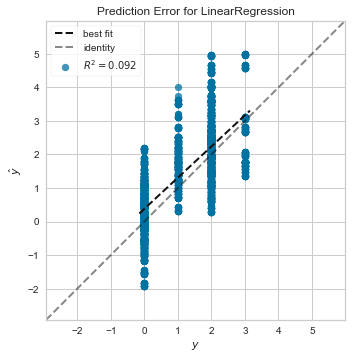

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [197]:
visualizer = PredictionError(LinearReg)
visualizer.fit(X1_trains, y1_train_nb)  
visualizer.score(X1_tests, y1_test_gnb)        
visualizer.show()

#### Model Evaluation

In [198]:
results =[]

In [199]:
results.append(R2_score_test_lr)
results.append(R2_score_test_rf)
results.append(R2_score_test_gnb)

In [200]:
results

[-6.4512773729089625, 0.7063724037014705, -4.102780611621714]

In [201]:
df_result = pd.DataFrame({"ML Models":["Linear_Regression","Random_Forest Regression",'Guassian_NB'],"Result: R2 Score":results})


In [202]:
df_result

,ML Models,Result: R2 Score
0,Linear_Regression,-6.451277
1,Random_Forest Regression,0.706372
2,Guassian_NB,-4.102781


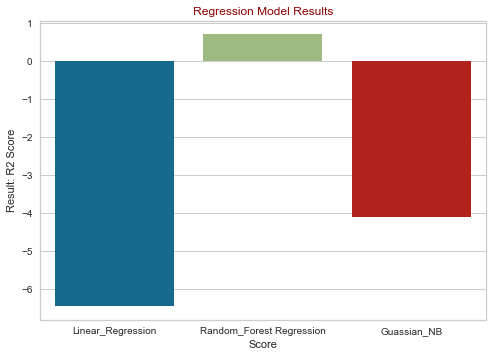

In [203]:
sns.barplot("ML Models","Result: R2 Score", data = df_result)
plt.xlabel("Score")
plt.title("Regression Model Results", color = "darkred")
plt.show()

## Feature Selection using Selector
- Now we shall use diamentiaonality Reduction using feature selection and try the predictions

In [207]:
selector = SelectFromModel(rf(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(X1_train, y1_train)

SelectFromModel(estimator=RandomForestRegressor(n_jobs=-1, random_state=42))

In [210]:
selected_feat = X1_train.columns[(selector.get_support())].tolist()
print('Total Features Selected are', len(selected_feat))
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Features:', selected_feat)
# Non scaled X variables are used for feature selection
# Scaling will be done after selection of features
# In this case selection of features usning this mentod does not work as it clearly says that both region and month has an effect on price

Total Features Selected are 6
Threshold set by Model: 0.02
Features: ['volume', 'type_organic', 'region_HartfordSpringfield', 'region_NewYork', 'region_SanFrancisco', 'seasons_winter']


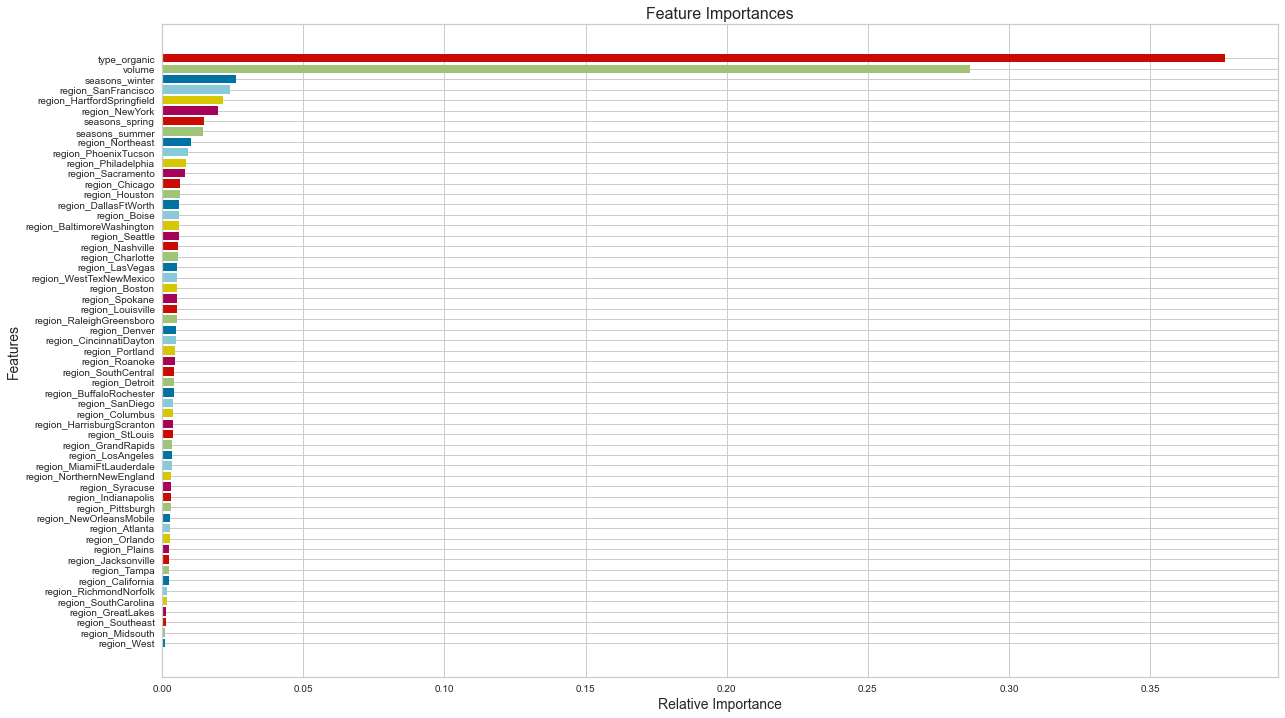

In [211]:
figure = plt.figure(figsize = [20, 12])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative=False)
viz.fit(X1_train, y1_train)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

In [214]:
#X_train = pd.get_dummies(X1_train, columns=['type','region','seasons'], drop_first =True)
X2_train = X1_train[selected_feat]
X2_test  = X1_test[selected_feat]

In [216]:
y_train = region_train['price']
y_test = region_test['price']


In [217]:
print(X2_train.shape)
X2_train.head(5)


(14330, 6)


,volume,type_organic,region_HartfordSpringfield,region_NewYork,region_SanFrancisco,seasons_winter
0,7103726.14,0,0,0,0,1
1,3056.43,1,0,0,0,0
2,17232.43,1,0,0,0,1
3,40058.59,1,0,0,0,0
4,194103.11,0,0,0,0,0


In [218]:
print(X2_test.shape)
X2_test.head(5)

(3581, 6)


,volume,type_organic,region_HartfordSpringfield,region_NewYork,region_SanFrancisco,seasons_winter
0,30480.39,1,0,0,0,0
1,416298.84,0,0,0,0,0
2,529138.31,0,0,0,0,0
3,181725.85,1,0,0,0,0
4,1377.24,1,0,0,0,0


In [219]:
scaler = StandardScaler() # cleate an object
scaler.fit(X2_train) #what should be the multiplication factor
X2_trains = scaler.transform(X2_train) #actually multiplies
X2_tests  = scaler.transform(X2_test)

In [221]:
LinearReg = LinearRegression()
LinearReg.fit(X2_train, y_train)
y2_lr_train = LinearReg.predict(X2_trains)
y2_lr_test  = LinearReg.predict(X2_tests)

In [222]:
RMSE_test_lr_2 = np.sqrt(metrics.mean_squared_error(y2_test, y2_lr_test)) 
RMSE_train_lr_2 = np.sqrt(metrics.mean_squared_error(y2_train, y2_lr_train)) 

R2_score_train_lr_2 =  metrics.r2_score(y2_train, y2_lr_train)
R2_score_test_lr_2 =  metrics.r2_score(y2_test, y2_lr_test)

print('Train RMSE_lr :' ,  RMSE_train_lr_2)
print('Test  RMSE_lr :' ,  RMSE_test_lr_2)
print('Train R2_lr   :', R2_score_train_lr_2)
print('Test  R2_lr   :', R2_score_test_lr_2)

Train RMSE_lr : 0.7164304937184801
Test  RMSE_lr : 0.7239452467560917
Train R2_lr   : -2.141963815465616
Test  R2_lr   : -2.2033334717881146


In [223]:
df_linReg_result_fs = pd.DataFrame({'Actual': y_test, 'Predicted': y2_lr_test})
df_linReg_result_fs.head(5)

,Actual,Predicted
0,2.11,1.604275
1,0.98,0.672431
2,1.17,0.672431
3,1.78,1.604275
4,1.61,1.604275


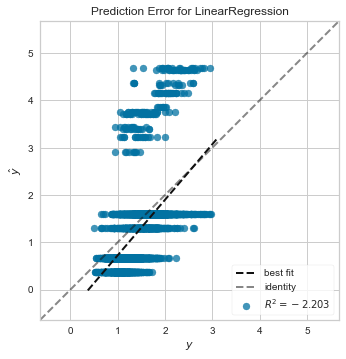

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [224]:
visualizer = PredictionError(LinearReg)
visualizer.fit(X2_trains, y_train)  
visualizer.score(X2_tests, y_test)        
visualizer.show()

### Model Evaluation

In [226]:
result_region=[]

In [227]:
result_region.append(R2_score_test_lr)
result_region.append(R2_score_test_rf)
result_region.append(R2_score_test_gnb)
result_region.append(R2_score_test_lr_2)

In [228]:
df_result_region = pd.DataFrame({"ML Models":["Linear_Regression","Random_Forest Regression","GaussianNB",'Feature Selection Model'],"Result: R2 Score":result_region})



In [229]:
df_result_region

,ML Models,Result: R2 Score
0,Linear_Regression,-6.451277
1,Random_Forest Regression,0.706372
2,GaussianNB,-4.102781
3,Feature Selection Model,-2.203333


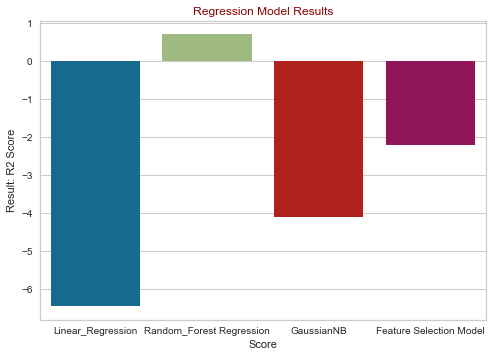

In [230]:
sns.barplot("ML Models","Result: R2 Score", data = df_result_region)
plt.xlabel("Score")
plt.title("Regression Model Results", color = "darkred")
plt.show()

## Total US Data

In [231]:
us_train.head()

,price,volume,type,region,seasons
52,1.26,1179603.03,organic,TotalUS,spring
65,1.66,638192.89,organic,TotalUS,summer
67,1.18,38315500.43,conventional,TotalUS,spring
78,1.07,40741214.05,conventional,TotalUS,winter
107,1.58,616177.00,organic,TotalUS,winter


In [241]:
us_test.head(3)

,price,volume,type_organic,seasons_spring,seasons_summer,seasons_winter
20,1.59,714266.31,1,1,0,0
57,0.82,46324529.70,0,1,0,0
158,1.02,28243505.52,0,0,0,0


In [235]:
us_train.drop('region', axis=True, inplace=True)
us_test.drop('region', axis=True, inplace=True)

In [245]:
us_train = pd.get_dummies(us_train, columns=['type','seasons'], drop_first =True)

In [237]:
us_test  = pd.get_dummies(us_test, columns=['type','seasons'], drop_first =True)

In [246]:
# There are various ways to do the feature selection, here is one
# Train Data
X3_train = us_train.loc[:, us_train.columns != 'price']
y3_train = us_train['price']

#Test Data
X3_test = us_test.loc[:, us_test.columns != 'price']
y3_test = us_test['price']

In [247]:
scaler = StandardScaler() # cleate an object
scaler.fit(X3_train) #what should be the multiplication factor
X3_trains = scaler.transform(X3_train) #actually multiplies
X3_tests  = scaler.transform(X3_test)

### Linear Regression

In [248]:
LinearReg = LinearRegression()
LinearReg.fit(X3_trains, y3_train)
y3_lr_train = LinearReg.predict(X3_trains)
y3_lr_test  = LinearReg.predict(X3_tests)

In [249]:
RMSE_us_test_total_lr = np.sqrt(metrics.mean_squared_error(y3_test, y3_lr_test)) 
RMSE_us_train_total_lr = np.sqrt(metrics.mean_squared_error(y3_train, y3_lr_train)) 

R2_us_train_total_lr =  metrics.r2_score(y3_train, y3_lr_train)
R2_us_test_total_lr =  metrics.r2_score(y3_test, y3_lr_test)

print('Train RMSE_lr :' ,  RMSE_us_train_total_lr)
print('Test  RMSE_lr :' ,  RMSE_us_test_total_lr)
print('Train R2_lr   :', R2_us_train_total_lr)
print('Test  R2_lr   :', R2_us_test_total_lr)

Train RMSE_lr : 0.17257313207552819
Test  RMSE_lr : 0.13937528397242432
Train R2_lr   : 0.6600065262029211
Test  R2_lr   : 0.7629307196003005


In [250]:
df_linReg_us_result = pd.DataFrame({'Actual': y3_test, 'Predicted': y3_lr_test})
df_linReg_us_result.head(5)

,Actual,Predicted
20,1.59,1.516744
57,0.82,0.971845
158,1.02,1.229875
254,1.59,1.446006
265,0.99,0.970355


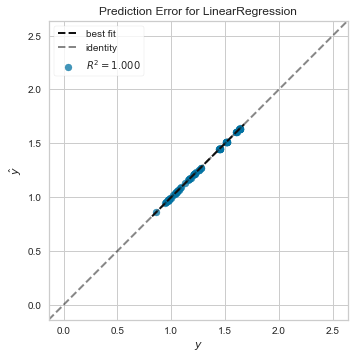

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [267]:
visualizer = PredictionError(LinearReg)
visualizer.fit(X3_trains, y3_train)  
visualizer.score(X3_tests, y3_lr_test)        
visualizer.show()

### Random Forest Regression

In [268]:
RandForestReg = rf()
RandForestReg.fit(X3_trains, y3_train)
y3_rf_train = RandForestReg.predict(X3_trains)
y3_rf_test  = RandForestReg.predict(X3_tests)

In [269]:
RMSE_us_test_rf = np.sqrt(metrics.mean_squared_error(y3_test, y3_rf_test)) 
RMSE_us_train_rf = np.sqrt(metrics.mean_squared_error(y3_train, y3_rf_train)) 

R2_us_score_train_rf =  metrics.r2_score(y3_train, y3_rf_train)
R2_us_score_test_rf =  metrics.r2_score(y3_test, y3_rf_test)

print('Train RMSE_lr :' ,  RMSE_us_train_rf)
print('Test  RMSE_lr :' ,  RMSE_us_test_rf)
print('Train R2_lr   :', R2_us_score_train_rf)
print('Test  R2_lr   :', R2_us_score_test_rf)

Train RMSE_lr : 0.06444920711225063
Test  RMSE_lr : 0.16030438573837122
Train R2_lr   : 0.9525802373566796
Test  R2_lr   : 0.6863866370464626


In [270]:
df_RandForestReg_result = pd.DataFrame({'Actual': y3_test, 'Predicted': y3_rf_test})
df_RandForestReg_result.head(5)

,Actual,Predicted
20,1.59,1.5440
57,0.82,1.0383
158,1.02,0.9605
254,1.59,1.4393
265,0.99,1.0407


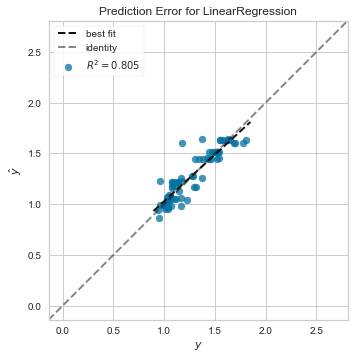

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [271]:
visualizer = PredictionError(LinearReg)
visualizer.fit(X3_trains, y3_train)  
visualizer.score(X3_tests, y3_rf_test)        
visualizer.show()

#### Model Evaluation

In [272]:
results_us=[]

In [273]:
results_us.append(R2_us_test_total_lr)
results_us.append(R2_us_score_test_rf)

In [276]:
results_us

[0.7629307196003005, 0.6863866370464626]

In [277]:
df_result_us = pd.DataFrame({"ML Models":["Linear_Regression","Random_Forest Regression"],"Result: R2 Score":results_us})

In [278]:
df_result_us

,ML Models,Result: R2 Score
0,Linear_Regression,0.762931
1,Random_Forest Regression,0.686387


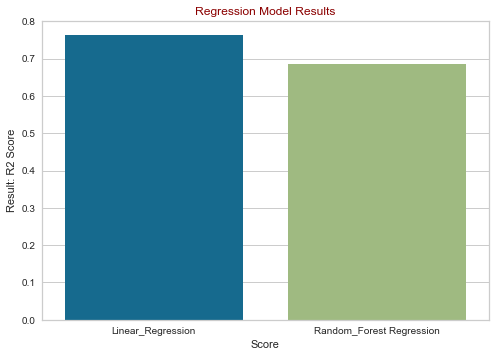

In [279]:
results=[]#### Model Evaluation

results.append(R2_us_test_total_lr)
results.append(R2_us_score_test_rf)

results

df_result = pd.DataFrame({"ML Models":["Linear_Regression","Random_Forest Regression"],"Result: R2 Score":results})


df_result

sns.barplot("ML Models","Result: R2 Score", data = df_result)
plt.xlabel("Score")
plt.title("Regression Model Results", color = "darkred")
plt.show()

## Conclusion

### Model Selection
- Random Forest Regression is a better suited model when it comes to regional data
- Linear Regression is a better choice for using in Total US Data